Nama : Muhammad Bastian Hanafi


NIM  : 20.11.3714


Kelas: 20 IF 07

In [ ]:
import pandas as pd # dataframe
import numpy as np # use for working with arrays and maths
import seaborn as sns
from matplotlib import pyplot as plt #plotting
from sklearn.datasets import make_blobs # generate data
from sklearn.cluster import KMeans #main algorithm

import warnings
warnings.filterwarnings('ignore')

#determining number of cluster
from sklearn.metrics import silhouette_score

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
df.isna().sum()
# no null or missing value on dataset

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [ ]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


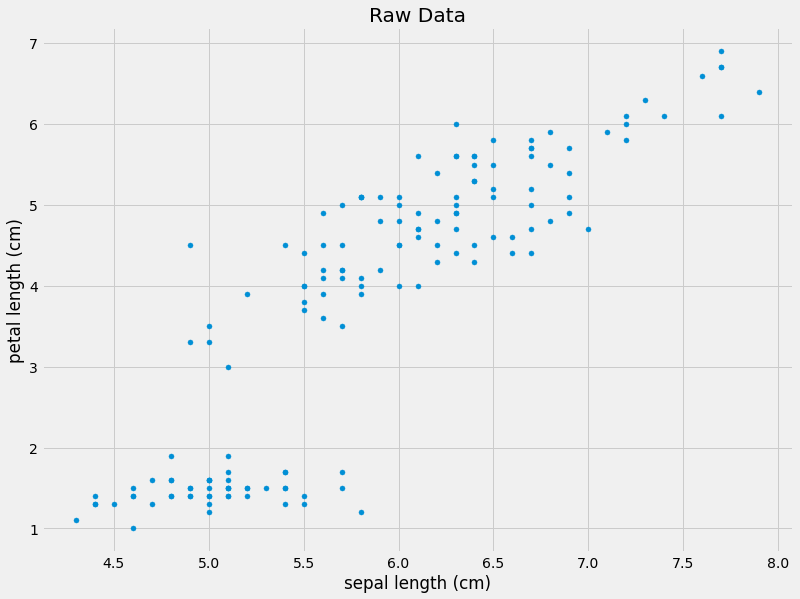

In [ ]:
plt.figure(figsize=(12,9))
plt.scatter(df['sepal length (cm)'],df['petal length (cm)'], s = 25)
plt.title('Raw Data')
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.show()

In [ ]:
# ambil data 	sepal length (cm)	dan petal length (cm)
X = np.array(df.iloc[:, [0,2]])
X

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4],
       [5.4, 1.7],
       [4.6, 1.4],
       [5. , 1.5],
       [4.4, 1.4],
       [4.9, 1.5],
       [5.4, 1.5],
       [4.8, 1.6],
       [4.8, 1.4],
       [4.3, 1.1],
       [5.8, 1.2],
       [5.7, 1.5],
       [5.4, 1.3],
       [5.1, 1.4],
       [5.7, 1.7],
       [5.1, 1.5],
       [5.4, 1.7],
       [5.1, 1.5],
       [4.6, 1. ],
       [5.1, 1.7],
       [4.8, 1.9],
       [5. , 1.6],
       [5. , 1.6],
       [5.2, 1.5],
       [5.2, 1.4],
       [4.7, 1.6],
       [4.8, 1.6],
       [5.4, 1.5],
       [5.2, 1.5],
       [5.5, 1.4],
       [4.9, 1.5],
       [5. , 1.2],
       [5.5, 1.3],
       [4.9, 1.4],
       [4.4, 1.3],
       [5.1, 1.5],
       [5. , 1.3],
       [4.5, 1.3],
       [4.4, 1.3],
       [5. , 1.6],
       [5.1, 1.9],
       [4.8, 1.4],
       [5.1, 1.6],
       [4.6, 1.4],
       [5.3, 1.5],
       [5. , 1.4],
       [7. , 4.7],
       [6.4, 4.5],
       [6.9,

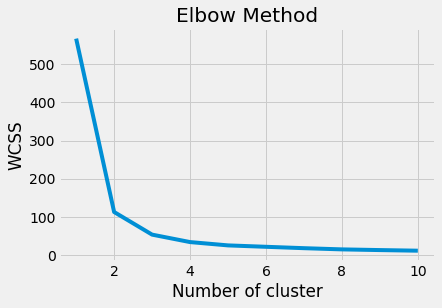

In [ ]:
# mencari jumlah cluster yang optimal menggunakan metode elbow method
wcss = []
for i in range (1, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)


plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of cluster')
plt.ylabel('WCSS')
plt.show()



jumlah cluster maksimal ada pada angka 3

In [ ]:
# clustering menggunakan algoritma KMeans
kmeans = KMeans(n_clusters=3, max_iter=500, n_init=10, random_state=0)
kmeans_preds = kmeans.fit_predict(X)
kmeans_preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

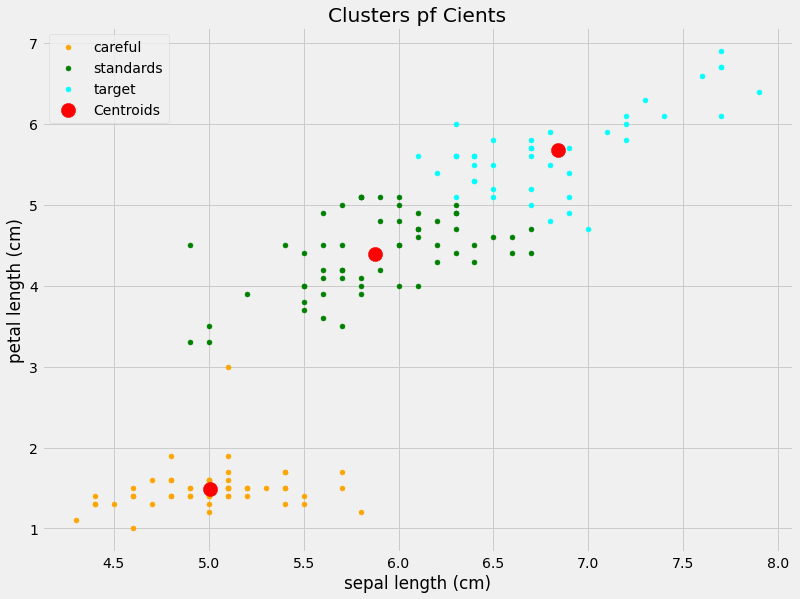

In [ ]:
# plot hasil clustering
points_size = 25
colors = ['orange', 'green', 'cyan']
labels = ['careful','standards', 'target']

plt.figure(figsize = (12,9))
for i in range(3):
  plt.scatter(X[kmeans_preds == i, 0], X[kmeans_preds == i,1], s = points_size, c = colors[i], label = labels[i])

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 200, c = 'red', label = 'Centroids')

plt.title('Clusters pf Cients')
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.legend(loc = 'best')
plt.show()

In [ ]:
# menambahkan column cluster di dataset 
df['cluster'] = kmeans_preds
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
# mendapatkan jumlah data pada setiap cluster
df.groupby(['cluster'])['cluster'].count()

cluster
0    51
1    58
2    41
Name: cluster, dtype: int64

In [ ]:
# coba memperediksi data baru
print(kmeans.predict([[10.0, 2.0]]))

[1]


# Multifeature clustering

In [ ]:
# import library untuk plot 3d
import plotly as py
import plotly.graph_objs as go

In [ ]:
#  import dataset 
df1 = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# check korelasi dengan pearson correlation
saya lakukan check korelasi karena di dataset ada 4 feature, yang akan di lakukan adalah Multifeature 3d

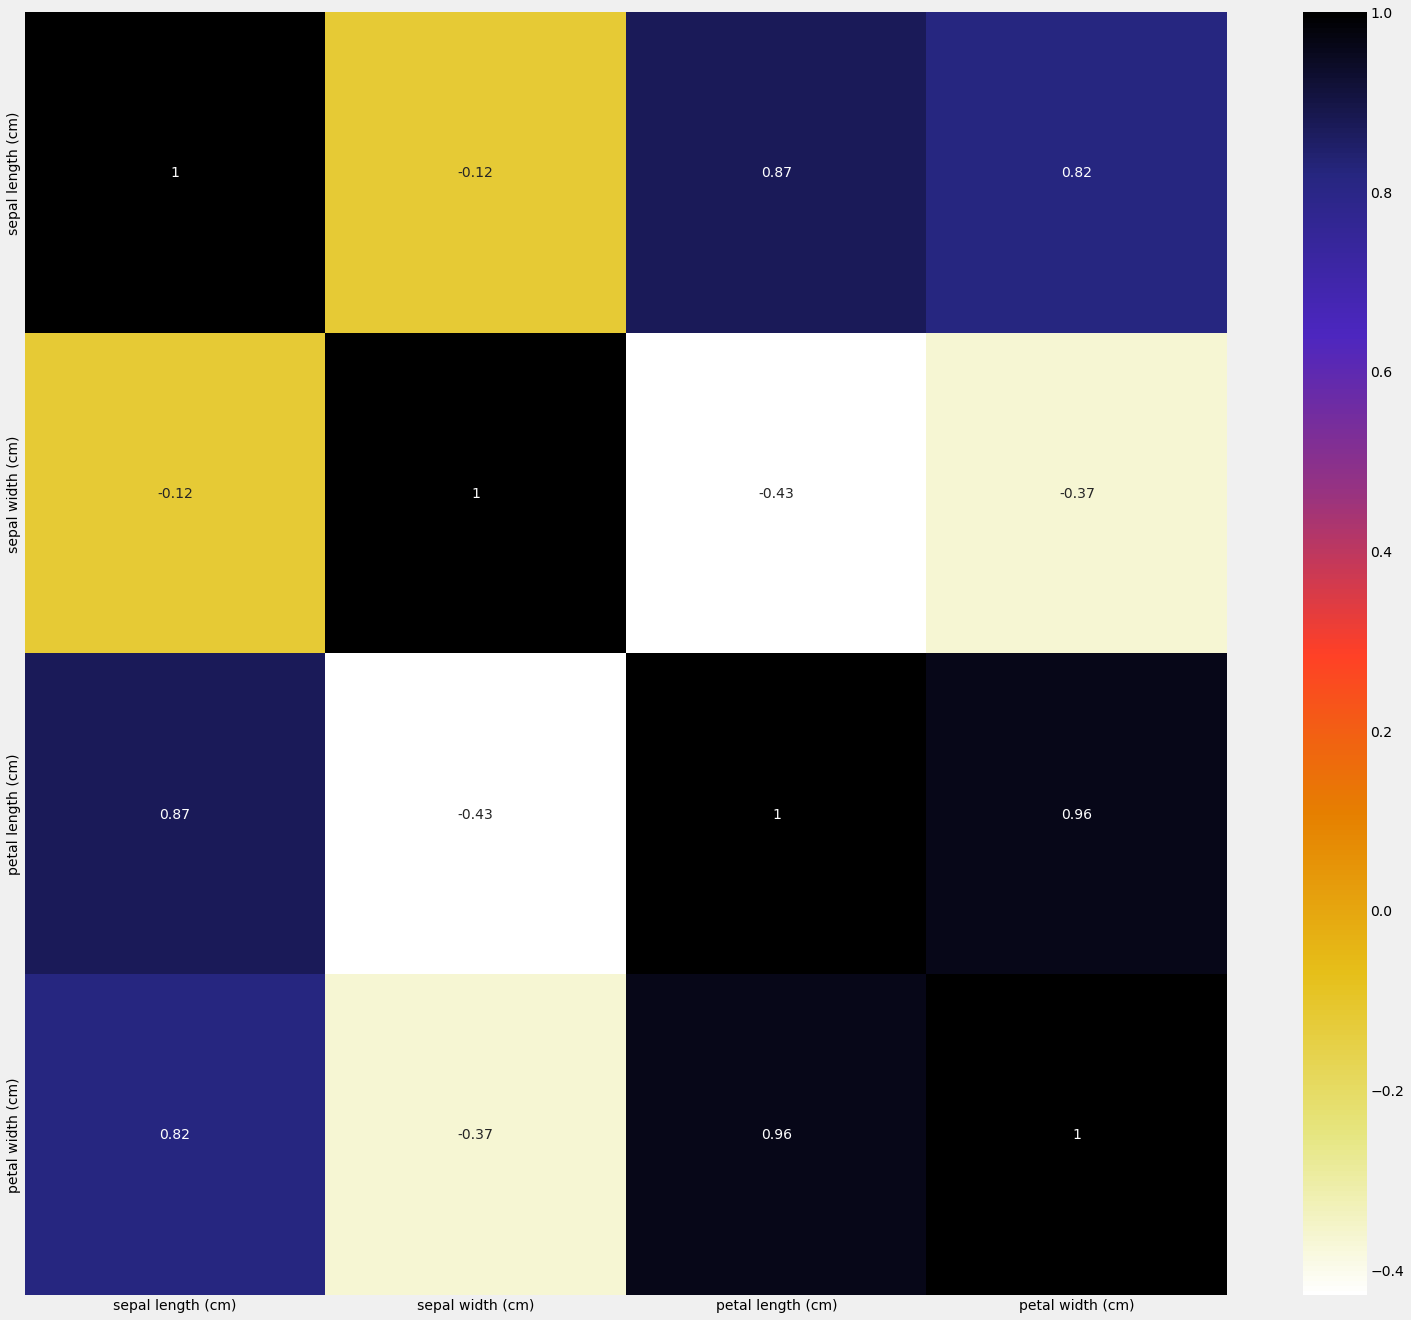

In [ ]:
cor = df1.corr()
plt.figure(figsize=(24,22))
sns.heatmap(cor, cmap=plt.cm.CMRmap_r,annot=True)
plt.show()  

dari hasil korelasi antar variabel di atas, feature sepal width (cm) memiliki korelasi lebih sedikit jika di bandingkan dengan feature yang lain sehingga tidak akan saya gunakan

In [ ]:
#convert data yang sudah di pilih ke np array (sepal length (cm)	petal length (cm)	petal width (cm))
X = np.array(df1.iloc[:, [0,2,3]])

In [ ]:
X[:5]

array([[5.1, 1.4, 0.2],
       [4.9, 1.4, 0.2],
       [4.7, 1.3, 0.2],
       [4.6, 1.5, 0.2],
       [5. , 1.4, 0.2]])

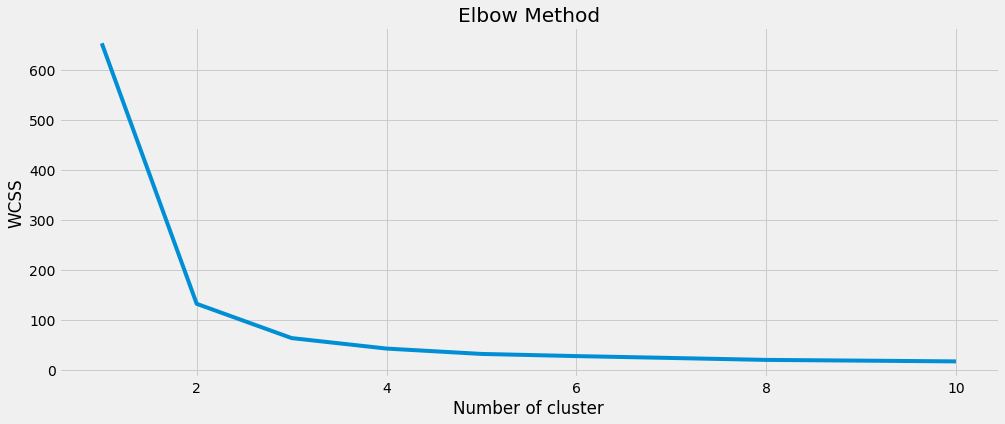

In [ ]:
# mencari jumlah cluster optimal menggunakan elbow method
wcss = []
for i in range (1, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

plt.figure(1, figsize = (15,6))
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of cluster')
plt.ylabel('WCSS')
plt.show()

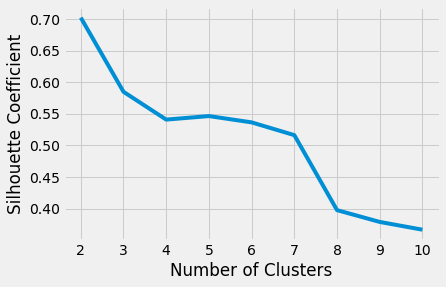

In [ ]:
#  mencari jumlah cluster yang optimal menggunakan silhouette
silhouette_coefficients = []

for k in range(2, 11):
  kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
  kmeans.fit(X)
  score = silhouette_score(X, kmeans.labels_)
  silhouette_coefficients.append(score)
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

# cluster optimum adalah 5

In [ ]:
kmeans = KMeans(n_clusters = 3, max_iter = 500, n_init = 10, random_state = 0)
kmeans_preds = kmeans.fit_predict(X)

In [ ]:
kmeans_preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [ ]:
labels3 = kmeans.labels_
centroids3 = kmeans.cluster_centers_
df['CLusterMultiFeatures'] = labels3

trace1 = go.Scatter3d(

    x= df['sepal width (cm)'],
    y = df['petal length (cm)'],
    z = df['petal width (cm)'],
    mode='markers',
    marker=dict(
        color= df['CLusterMultiFeatures'],
        size=20,
        line=dict(
          color= df['CLusterMultiFeatures'],
          width = 12
        ),
        opacity=0.8
    )
)
data = [trace1]
layout = go.Layout(
    title= 'Clusters',
    scene = dict(
        xaxis = dict(title = 'sepal width (cm)'),
        yaxis = dict(title = 'petal length (cm)'),
        zaxis = dict(title = 'petal width (cm)')
    )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

In [ ]:
labels3 = kmeans.labels_


In [ ]:
labels3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [ ]:
# menambahkan column cluster ke dataset
df1['cluster'] = kmeans_preds
df1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
df1.groupby(['cluster'])['cluster'].count()

cluster
0    50
1    62
2    38
Name: cluster, dtype: int64